# MOVIE RECOMMENDATION SYSTEM

Create a recommendation system that will pedict a movie based on user data/option/ choice of interest

##### Import Relevnt libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import missingno as msno
import os
import csv
import sys

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 55)

sb.set_style("darkgrid")
sb.set()

##### Load Data from Local machine

In [6]:
df = pd.read_csv("D:\Open Classroom\Datasets\Movie Recommendation System\Dataset.csv")

titles_df = pd.read_csv("D:\Open Classroom\Datasets\Movie Recommendation System\Movie_Id_Titles.csv")


We have imported 2 Datasets, where the first dataset contains User_Id, Item_Id, rating and timestamp relation to the movie, while the second dataset contaions only the Movies Titles and Item_Id 

##### Statistical Analysis of the data 

In [8]:
df.shape

(100003, 4)

In [10]:
df.describe().round()

,user_id,item_id,rating,timestamp
count,100003.0,100003.0,100003.0,100003.0
mean,462.0,426.0,4.0,883528783.0
std,267.0,331.0,1.0,5343791.0
min,0.0,1.0,1.0,874724710.0
25%,254.0,175.0,3.0,879448715.0
50%,447.0,322.0,4.0,882826944.0
75%,682.0,631.0,4.0,888259984.0
max,943.0,1682.0,5.0,893286638.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

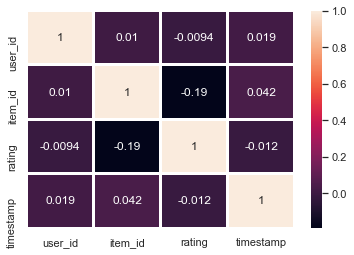

In [14]:
sb.heatmap(df.corr(), annot=True, linewidths = 2)

In [15]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [18]:
df.astype("int64")

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [37]:
df.user_id.unique()

array([  0, 196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286,
       200, 210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,
        38, 102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,
         7,  10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,
        25,  59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189,
       243,  92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,
        28, 135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,
        94, 128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85,
       213, 121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26,
       130, 256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272,
       151,  54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192,
       100, 307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,
        33, 154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104,
       240, 144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 23

In [24]:
df.item_id.unique()

array([  50,  172,  133, ..., 1637, 1630, 1641], dtype=int64)

In [26]:
df.rating.unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [27]:
titles_df.shape

(1682, 2)

In [29]:
titles_df.describe().round()

,item_id
count,1682.0
mean,842.0
std,486.0
min,1.0
25%,421.0
50%,842.0
75%,1262.0
max,1682.0


In [31]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [40]:
titles_df.title.unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

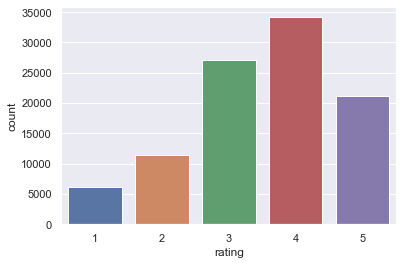

In [103]:
sb.countplot(df["rating"])

In [104]:
titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Exploratory Data Analysis

In [48]:
new_df = pd.merge(df, titles_df)

In [105]:
new_df.head()

,user_id,item_id,rating,title,remarks
0,0,50,5,Star Wars (1977),None
1,290,50,5,Star Wars (1977),None
2,79,50,4,Star Wars (1977),None
3,2,50,5,Star Wars (1977),Partly Recoomended
4,8,50,5,Star Wars (1977),None


In [54]:
new_df.drop(columns = ["timestamp"], inplace = True)

In [119]:
print("Movies with highest Ratings")
ratings_per_movie = new_df.groupby("title")
r = ratings_per_movie["rating"].sum().rename("total_ratings").sort_values(ascending = False).to_frame().head(10)
r

Movies with highest Ratings


,total_ratings
title,
Star Wars (1977),2546
Fargo (1996),2111
Return of the Jedi (1983),2032
Contact (1997),1936
Raiders of the Lost Ark (1981),1786
"Godfather, The (1972)",1769
"English Patient, The (1996)",1759
Toy Story (1995),1753
"Silence of the Lambs, The (1991)",1673


Get the mean of the Ratings

In [117]:
m = ratings_per_movie["rating"].sum().mean()
m

212.13762019230768

In [124]:
above_avg_rating = r["total_ratings"] >= m
r[above_avg_rating].head()

,total_ratings
title,
Star Wars (1977),2546
Fargo (1996),2111
Return of the Jedi (1983),2032
Contact (1997),1936
Raiders of the Lost Ark (1981),1786


In [128]:
rating_sum = new_df["rating"].sum()
rating_sum

352997

In [131]:
r["rating %"] = r["total_ratings"] / rating_sum
r.head()

,total_ratings,rating %
title,,
Star Wars (1977),2546,0.007213
Fargo (1996),2111,0.005980
Return of the Jedi (1983),2032,0.005756
Contact (1997),1936,0.005484
Raiders of the Lost Ark (1981),1786,0.005060
